# KMeans를 이용한 이미지 압축

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data
### 1.1 Data Load

In [3]:
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")

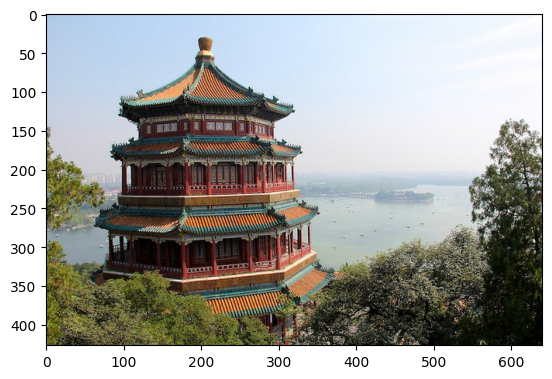

In [4]:
plt.imshow(china)

## 1.2 Data Scaling

In [6]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [7]:
china_flatten = china / 255.0
china_flatten = china_flatten.reshape(-1, 3)
china_flatten.shape

(273280, 3)

### 1.3 Data EDA

In [8]:
def plot_pixels(data, colors=None, N=10000):
  if colors is None:
    colors = data

  rng = np.random.RandomState(0)
  i = rng.permutation(data.shape[0])[:N]
  colors = colors[i]
  R, G, B = data[i].T

  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  ax[0].scatter(R, G, color=colors, marker='.')
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0,1))

  ax[1].scatter(R, B, color=colors, marker='.')
  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

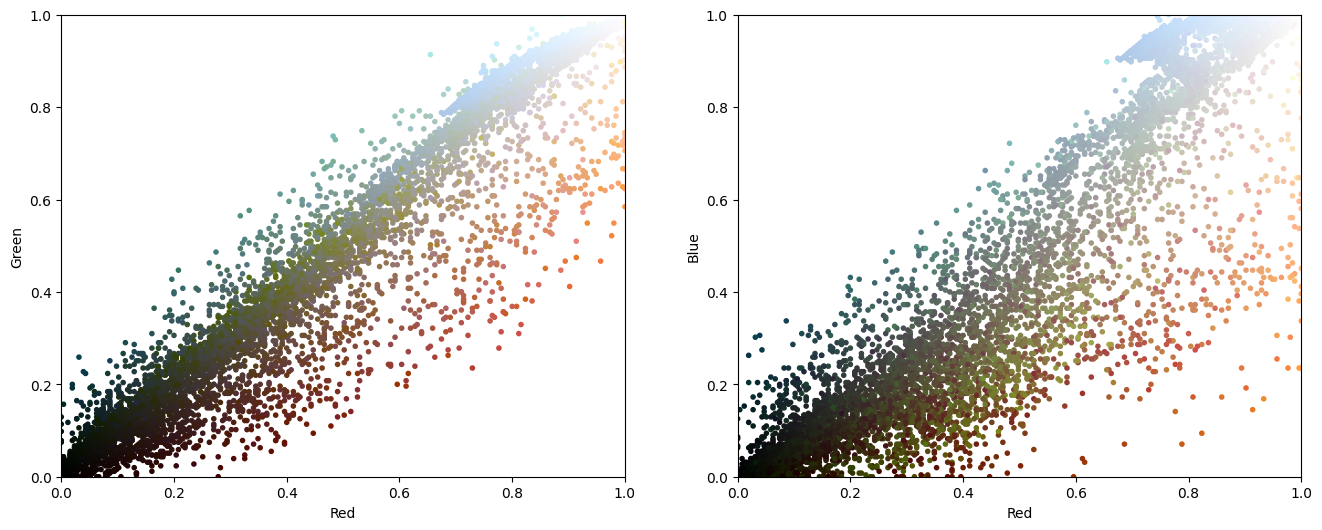

In [9]:
plot_pixels(china_flatten)

## 2. KMeans

### 2.1 학습

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16)

In [11]:
 kmeans.fit(china_flatten)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=16)

### 2.2 새로운 색상

In [14]:
kmeans.cluster_centers_

array([[0.94677021, 0.96189003, 0.98658565],
       [0.3631889 , 0.2548443 , 0.12790399],
       [0.68877077, 0.39217748, 0.28437508],
       [0.1524257 , 0.12474224, 0.09002017],
       [0.80340988, 0.82384934, 0.84296969],
       [0.21487451, 0.21965224, 0.17696364],
       [0.43139253, 0.44987676, 0.40556148],
       [0.70933515, 0.74802872, 0.73834568],
       [0.58550523, 0.62922899, 0.613776  ],
       [0.45558189, 0.42639859, 0.22336961],
       [0.75129593, 0.83979159, 0.93988925],
       [0.56862982, 0.54430122, 0.42392742],
       [0.86325963, 0.62369904, 0.45818299],
       [0.32663123, 0.32674945, 0.27605775],
       [0.05309609, 0.05005092, 0.0275222 ],
       [0.86697269, 0.91298842, 0.96437902]])

### 2.3 변환

In [15]:
new_color_label = kmeans.predict(china_flatten)

In [17]:
new_colors = kmeans.cluster_centers_[new_color_label]

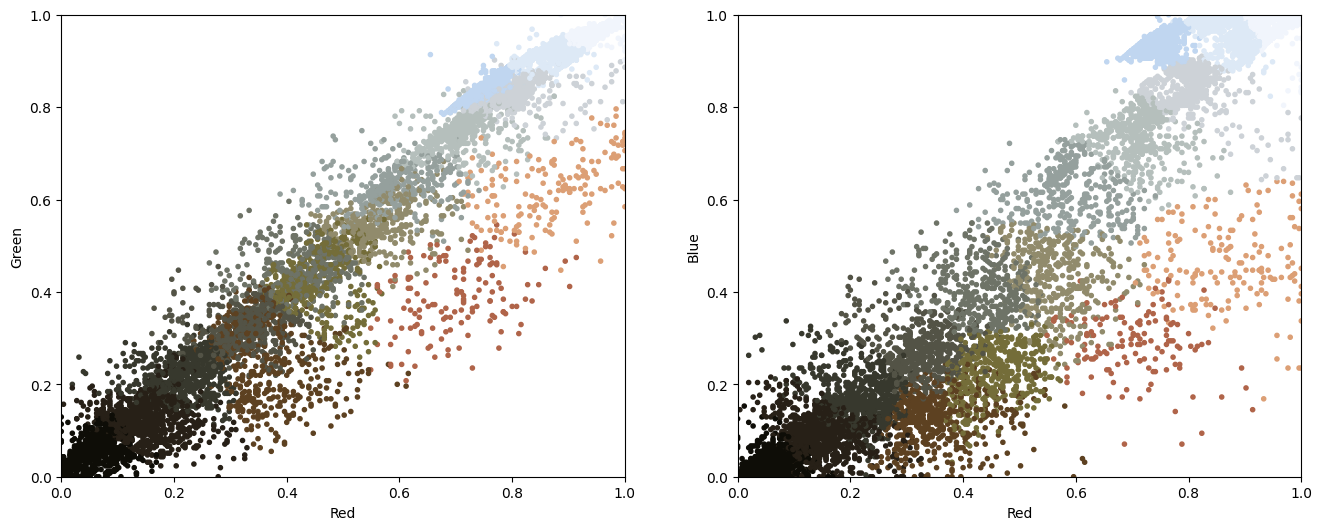

In [19]:
plot_pixels(china_flatten, colors=new_colors)

Text(0.5, 1.0, '16-color Image')

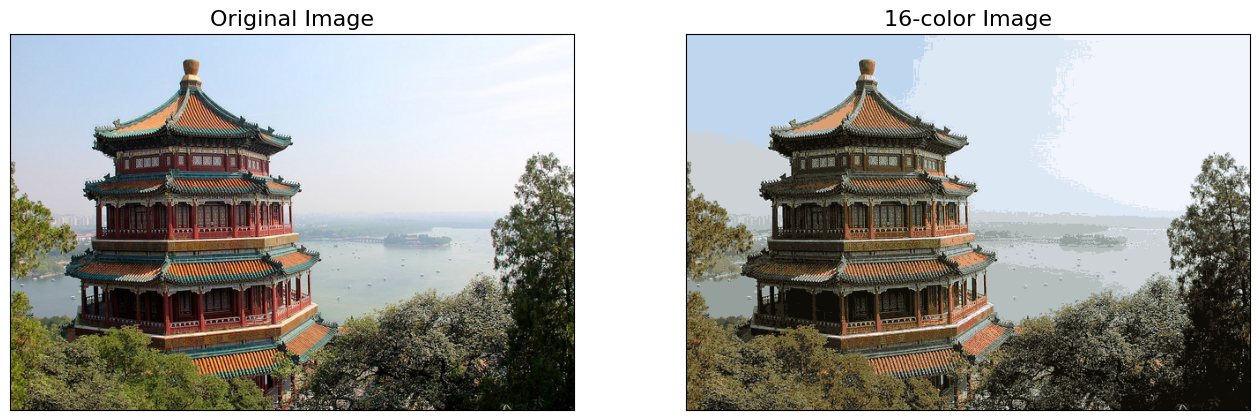

In [20]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))

# fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16)

## 3. 더 작은 K

### 3.1 학습

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)

In [22]:
kmeans.fit(china_flatten)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

### 3.2 새로운 색상

In [26]:
kmeans.cluster_centers_

array([[0.67333356, 0.70865004, 0.69608206],
       [0.24116259, 0.21372922, 0.15541213],
       [0.91789381, 0.94365335, 0.9771835 ],
       [0.5188702 , 0.51761179, 0.43090151],
       [0.40815852, 0.36622305, 0.24583586],
       [0.77686907, 0.83701725, 0.90216147],
       [0.0873163 , 0.07650325, 0.05106137],
       [0.81657636, 0.56726144, 0.4088733 ]])

### 3.3 변환

In [27]:
new_color_label = kmeans.predict(china_flatten)

In [28]:
new_colors = kmeans.cluster_centers_[new_color_label]

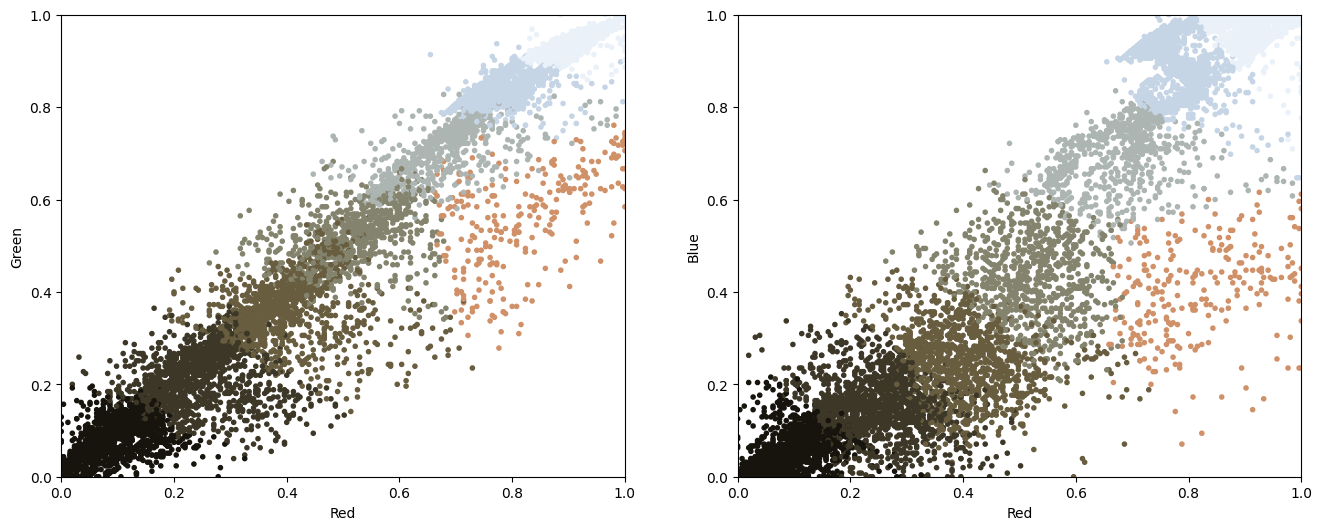

In [29]:
plot_pixels(china_flatten, colors=new_colors)

Text(0.5, 1.0, '16-color Image')

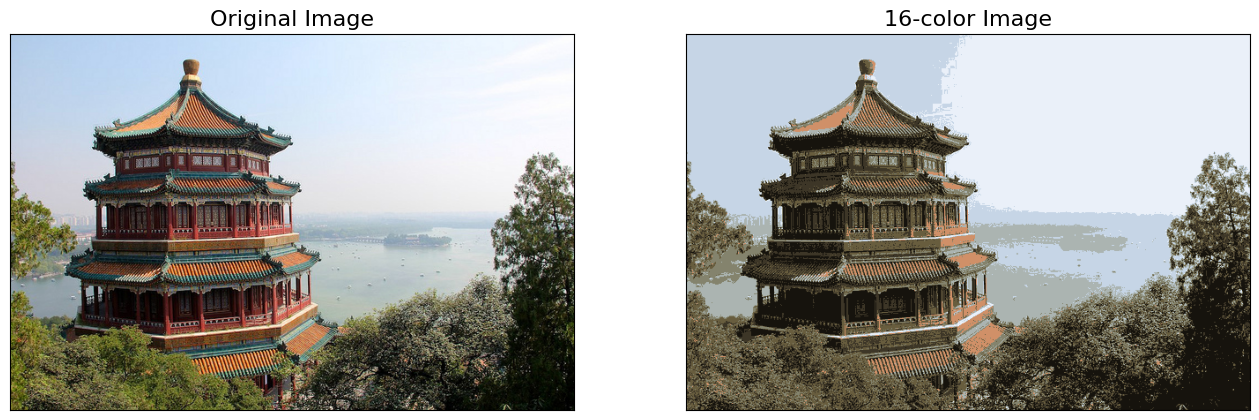

In [30]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))

# fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16)